Original Quelle: <br />
https://www.ssa.gov/oact/babynames/names.zip

Ein Code zum zusammenfügen der Dateien:<br />
https://schwarzerwolf.cc/blog/2018/10/19/python-37-python-data-analysis-2nd-edition-kleiner-code-zum-zusammenfugen-der-dateien-im-babynames-ordner/

### Import

In [1]:
import pandas as pd

# only for jupyter notebook
%matplotlib inline

## Dataframe: erstellen | Infos anzigen

In [2]:
df = pd.read_csv('./america_babynames_full[1880-2017].csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924665 entries, 0 to 1924664
Data columns (total 5 columns):
id        int64
date      object
name      object
gender    object
count     int64
dtypes: int64(2), object(3)
memory usage: 73.4+ MB


In [4]:
df.head()

,id,date,name,gender,count
0,1,1880-12-31,Mary,F,7065
1,2,1880-12-31,Anna,F,2604
2,3,1880-12-31,Emma,F,2003
3,4,1880-12-31,Elizabeth,F,1939
4,5,1880-12-31,Minnie,F,1746


## Datum als Index setzen | id löschen

In [5]:
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')

# Löschen, da nicht benötigt in diesem Beispiel
del df['id']

In [6]:
df.head()

,name,gender,count
date,,,
1880-12-31,Mary,F,7065
1880-12-31,Anna,F,2604
1880-12-31,Emma,F,2003
1880-12-31,Elizabeth,F,1939
1880-12-31,Minnie,F,1746


## Geburten: Jungs / Mädchen pro Jahr

In [7]:
girls_boys = df.groupby([df.index, 'gender']).sum()
girls_boys = girls_boys.unstack()
girls_boys.columns = ['Mädchen', 'Jungen']

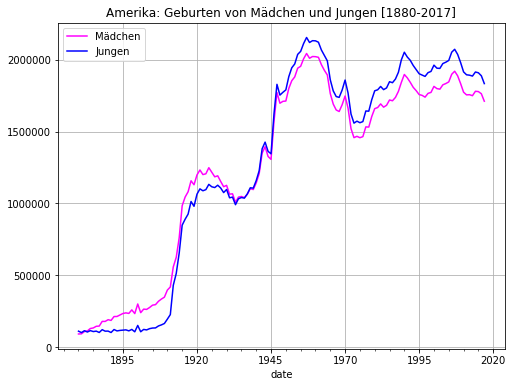

In [8]:
girls_boys.plot(figsize=(8, 6), 
                title='Amerika: Geburten von Mädchen und Jungen [1880-2017]', 
                grid=True, 
                color=('Magenta', 'Blue'))

#### Geburten ab dem Jahr 2000

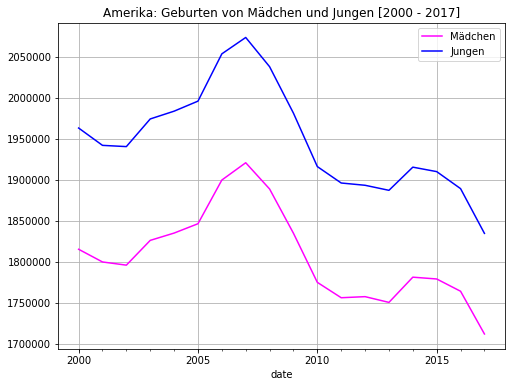

In [9]:
girls_boys.truncate(before='2000-12-31').plot(figsize=(8, 6), 
                title='Amerika: Geburten von Mädchen und Jungen [2000 - 2017]', 
                grid=True, 
                color=('Magenta', 'Blue'))

## Namen

In [10]:
names = df.pivot_table(values='count', index=df.index, columns='name', aggfunc='sum')

In [11]:
names.head()

name,Aaban,Aabha,Aabid,Aabir,Aabriella,Aada,Aadam,Aadan,Aadarsh,Aaden,...,Zytaveon,Zytavion,Zytavious,Zyus,Zyva,Zyvion,Zyvon,Zyyanna,Zyyon,Zzyzx
date,,,,,,,,,,,,,,,,,,,,,
1880-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1884-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Fehlende Daten mit 0 ersetzen

In [12]:
names.fillna(0, inplace=True)

In [13]:
names.head()

name,Aaban,Aabha,Aabid,Aabir,Aabriella,Aada,Aadam,Aadan,Aadarsh,Aaden,...,Zytaveon,Zytavion,Zytavious,Zyus,Zyva,Zyvion,Zyvon,Zyyanna,Zyyon,Zzyzx
date,,,,,,,,,,,,,,,,,,,,,
1880-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1881-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1882-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1883-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1884-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Pro Jahr | Gesamt [Kumuliert] anzeigen lassen

In [14]:
# pro Jahr
names['Fatima'][names['Fatima'] > 0]

date
1919-12-31       6.0
1921-12-31       5.0
1924-12-31       5.0
1927-12-31       5.0
1929-12-31       7.0
1930-12-31       7.0
1931-12-31       7.0
1932-12-31       6.0
1933-12-31       5.0
1935-12-31       6.0
1936-12-31       6.0
1937-12-31       6.0
1938-12-31      10.0
1939-12-31       9.0
1940-12-31       9.0
1941-12-31       6.0
1942-12-31       5.0
1943-12-31      11.0
1944-12-31      10.0
1945-12-31      12.0
1946-12-31      11.0
1947-12-31      23.0
1948-12-31      11.0
1949-12-31      27.0
1950-12-31      17.0
1951-12-31      19.0
1952-12-31      38.0
1953-12-31      20.0
1954-12-31      38.0
1955-12-31      36.0
               ...  
1988-12-31     293.0
1989-12-31     300.0
1990-12-31     366.0
1991-12-31     323.0
1992-12-31     361.0
1993-12-31     420.0
1994-12-31     400.0
1995-12-31     385.0
1996-12-31     422.0
1997-12-31     495.0
1998-12-31     511.0
1999-12-31     757.0
2000-12-31    1315.0
2001-12-31    1409.0
2002-12-31    1295.0
2003-12-31    1354.0
2004-12-

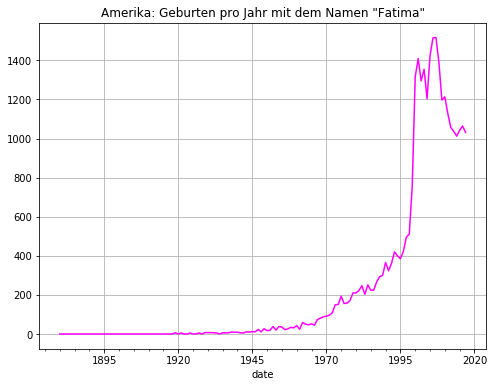

In [15]:
names['Fatima'].plot(figsize=(8, 6), 
                title='Amerika: Geburten pro Jahr mit dem Namen "Fatima"', 
                grid=True, 
                color='Magenta')

In [16]:
# Pro Jahr [Kumuliert]
names['Fatima'][names['Fatima'] > 0].cumsum()

date
1919-12-31        6.0
1921-12-31       11.0
1924-12-31       16.0
1927-12-31       21.0
1929-12-31       28.0
1930-12-31       35.0
1931-12-31       42.0
1932-12-31       48.0
1933-12-31       53.0
1935-12-31       59.0
1936-12-31       65.0
1937-12-31       71.0
1938-12-31       81.0
1939-12-31       90.0
1940-12-31       99.0
1941-12-31      105.0
1942-12-31      110.0
1943-12-31      121.0
1944-12-31      131.0
1945-12-31      143.0
1946-12-31      154.0
1947-12-31      177.0
1948-12-31      188.0
1949-12-31      215.0
1950-12-31      232.0
1951-12-31      251.0
1952-12-31      289.0
1953-12-31      309.0
1954-12-31      347.0
1955-12-31      383.0
               ...   
1988-12-31     4683.0
1989-12-31     4983.0
1990-12-31     5349.0
1991-12-31     5672.0
1992-12-31     6033.0
1993-12-31     6453.0
1994-12-31     6853.0
1995-12-31     7238.0
1996-12-31     7660.0
1997-12-31     8155.0
1998-12-31     8666.0
1999-12-31     9423.0
2000-12-31    10738.0
2001-12-31    12147.0
2002-

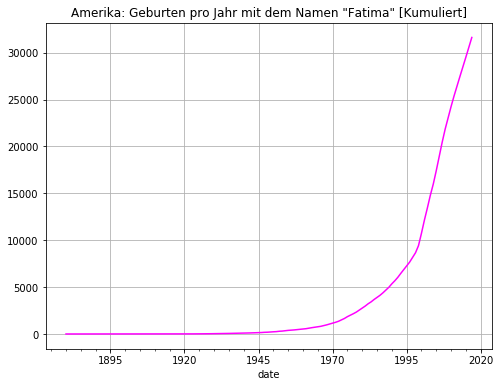

In [17]:
names['Fatima'].cumsum().plot(figsize=(8, 6), 
                title='Amerika: Geburten pro Jahr mit dem Namen "Fatima" [Kumuliert]', 
                grid=True, 
                color='Magenta')

#### Mehrere Namen verwenden

In [18]:
name_list = ['Mohamad', 'Mohamed', 'Mohammad', 'Mohammed', 'Muhamad', 'Muhamed', 'Muhammad', 'Muhammed']

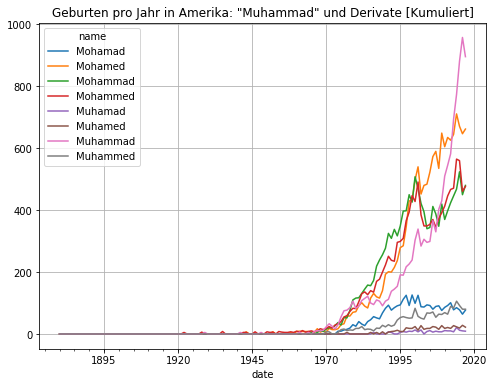

In [19]:
names[name_list].plot(figsize=(8, 6), 
                title='Geburten pro Jahr in Amerika: "Muhammad" und Derivate [Kumuliert]', 
                grid=True)

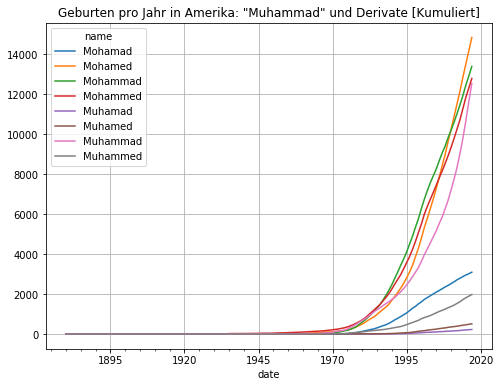

In [20]:
names[name_list].cumsum().plot(figsize=(8, 6), 
                title='Geburten pro Jahr in Amerika: "Muhammad" und Derivate [Kumuliert]', 
                grid=True)

#### Ab Jahr 1970 anzeigen lassen

Da in den ersten Jahrzehten kaum etwas los ist beim Namen Muhammad und seinen Derivaten, fangen wir nun bei 1970 an:

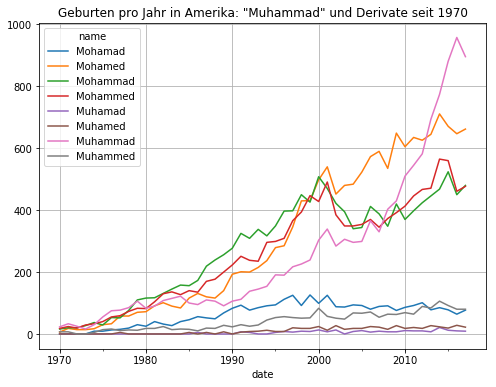

In [21]:
names[name_list].iloc[90:].plot(figsize=(8, 6), 
                title='Geburten pro Jahr in Amerika: "Muhammad" und Derivate seit 1970', 
                grid=True)

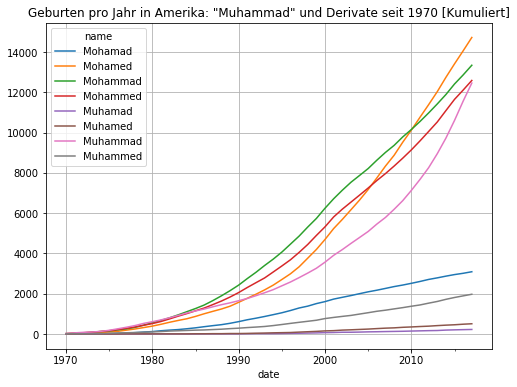

In [22]:
names[name_list].iloc[90:].cumsum().plot(figsize=(8, 6), 
                title='Geburten pro Jahr in Amerika: "Muhammad" und Derivate seit 1970 [Kumuliert]', 
                grid=True)

#### Muhammad und seine Derivate zusammengefasst

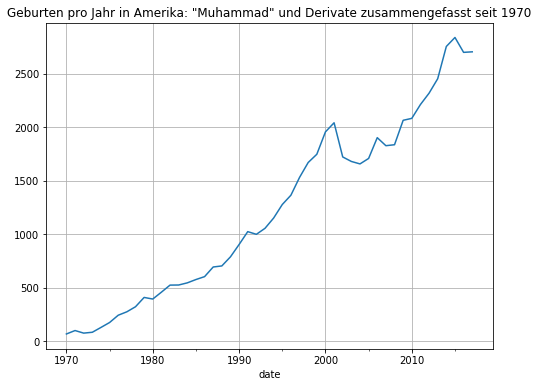

In [23]:
names[name_list].iloc[90:].sum(axis=1).plot(figsize=(8, 6), 
                title='Geburten pro Jahr in Amerika: "Muhammad" und Derivate zusammengefasst seit 1970', 
                grid=True)

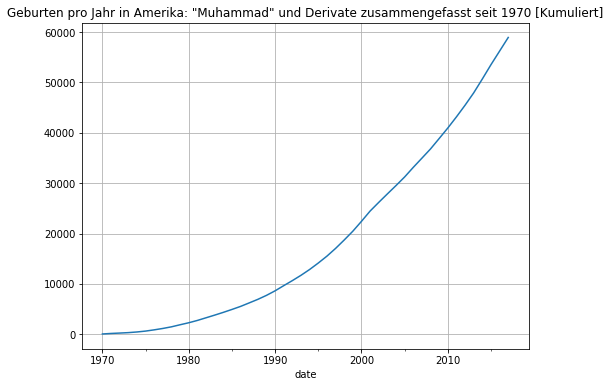

In [24]:
names[name_list].iloc[90:].sum(axis=1).cumsum().plot(figsize=(8, 6), 
                title='Geburten pro Jahr in Amerika: "Muhammad" und Derivate zusammengefasst seit 1970 [Kumuliert]', 
                grid=True)

#### Verteilung der Namen in Prozenten

In [25]:
names_ser_2017 = names_ser_2017 = names[name_list].iloc[-1]

In [26]:
names_ser_2017

name
Mohamad      77.0
Mohamed     662.0
Mohammad    480.0
Mohammed    477.0
Muhamad       9.0
Muhamed      22.0
Muhammad    896.0
Muhammed     80.0
Name: 2017-12-31 00:00:00, dtype: float64

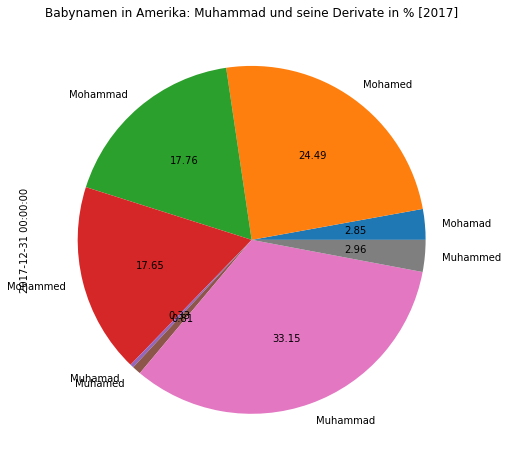

In [27]:
names_ser_2017.plot.pie(autopct='%.2f', 
                        figsize=(8, 8), 
                        title='Babynamen in Amerika: Muhammad und seine Derivate in % [2017]')

In [28]:
names_cumsum = names[name_list].cumsum()
names_ser = names_cumsum.iloc[-1]

In [29]:
names_ser

name
Mohamad      3090.0
Mohamed     14827.0
Mohammad    13379.0
Mohammed    12776.0
Muhamad       224.0
Muhamed       507.0
Muhammad    12526.0
Muhammed     1972.0
Name: 2017-12-31 00:00:00, dtype: float64

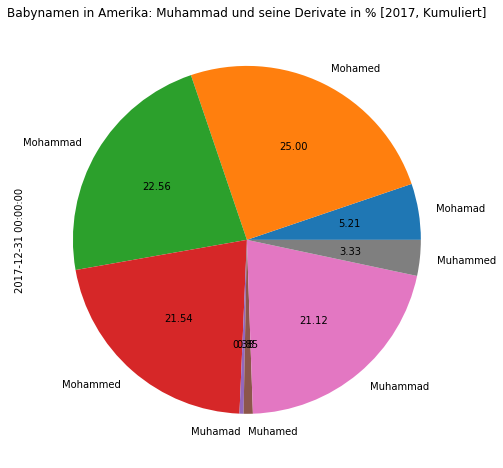

In [30]:
names_ser.plot.pie(autopct='%.2f', 
                   figsize=(8, 8), 
                   title='Babynamen in Amerika: Muhammad und seine Derivate in % [2017, Kumuliert]')

## Die 10 Häufigsten Mädchen und Jungennamen

#### Jahr 2017

Gemischt:

In [31]:
names.iloc[-1].nlargest(10)

name
Emma        19752.0
Liam        18764.0
Olivia      18642.0
Noah        18496.0
Ava         15914.0
Isabella    15112.0
Logan       15077.0
William     14922.0
Sophia      14848.0
James       14309.0
Name: 2017-12-31 00:00:00, dtype: float64

#### Beide Geschlechter getrennt

In [32]:
top = df.pivot_table(values='count', index=df.index, columns=['gender', 'name'], aggfunc='sum')
top.fillna(0, inplace=True)

In [33]:
top.head()

gender         F                                                             \
name       Aabha Aabriella Aada Aaden Aadhira Aadhvika Aadhya Aadi Aadilynn   
date                                                                          
1880-12-31   0.0       0.0  0.0   0.0     0.0      0.0    0.0  0.0      0.0   
1881-12-31   0.0       0.0  0.0   0.0     0.0      0.0    0.0  0.0      0.0   
1882-12-31   0.0       0.0  0.0   0.0     0.0      0.0    0.0  0.0      0.0   
1883-12-31   0.0       0.0  0.0   0.0     0.0      0.0    0.0  0.0      0.0   
1884-12-31   0.0       0.0  0.0   0.0     0.0      0.0    0.0  0.0      0.0   

gender              ...         M                                             \
name       Aadison  ...  Zyshonne Zytaevius Zytaveon Zytavion Zytavious Zyus   
date                ...                                                        
1880-12-31     0.0  ...       0.0       0.0      0.0      0.0       0.0  0.0   
1881-12-31     0.0  ...       0.0       0.0      0.0      0.0       0.0  0.0   
1882-12-31     0.0  ...       0.0       0.0      0.0      0.0       0.0  0.0   
1883-12-31     0.0  ...       0.0       0.0      0.0      0.0       0.0  0.0   
1884-12-31     0.0  ...       0.0       0.0      0.0      0.0       0.0  0.0   

gender                               
name       Zyvion Zyvon Zyyon Zzyzx  
date                                 
1880-12-31    0.0   0.0   0.0   0.0  
1881-12-31    0.0   0.0   0.0   0.0  
1882-12-31    0.0   0.0   0.0   0.0  
1883-12-31    0.0   0.0   0.0   0.0  
1884-12-31    0.0   0.0   0.0   0.0  

[5 rows x 107973 columns]

In [34]:
top_2017 = top.iloc[-1]
top_2017 = top_2017.unstack(level=0)

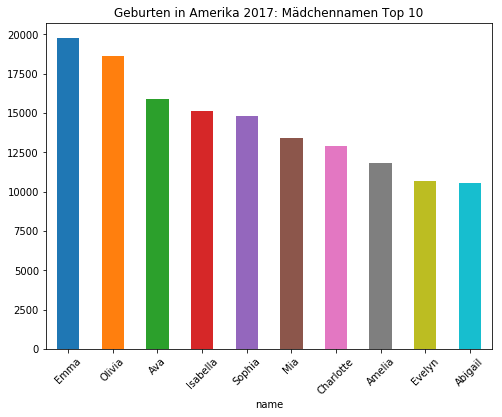

In [35]:
top_2017['F'].nlargest(10).plot(kind='bar', 
                                figsize=(8, 6), 
                                rot=45,
                                title='Geburten in Amerika 2017: Mädchennamen Top 10')

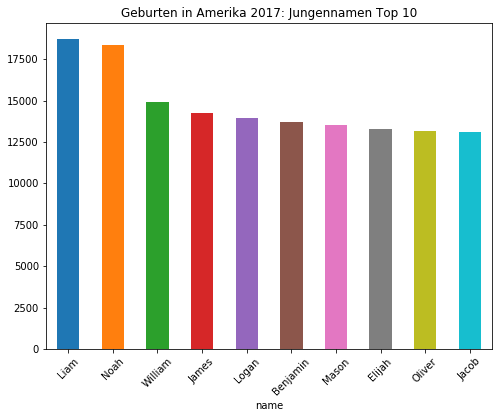

In [36]:
top_2017['M'].nlargest(10).plot(kind='bar', 
                                figsize=(8, 6), 
                                title='Geburten in Amerika 2017: Jungennamen Top 10', 
                                rot=45)

#### 1880-2017 (Kumuliert)

In [37]:
top_all = top.cumsum()
top_all = top_all.iloc[-1]
top_all = top_all.unstack(level=0)

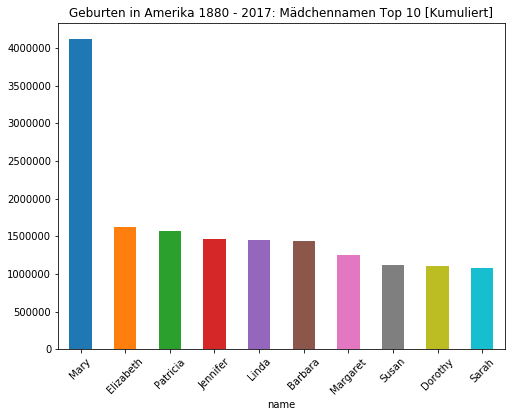

In [38]:
top_all['F'].nlargest(10).plot(kind='bar', 
                               figsize=(8, 6), 
                               title='Geburten in Amerika 1880 - 2017: Mädchennamen Top 10 [Kumuliert]', 
                               rot=45)

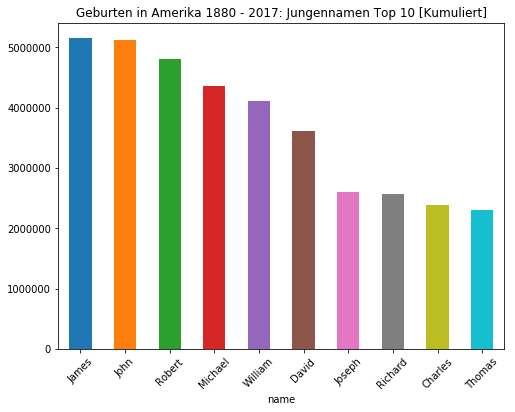

In [39]:
top_all['M'].nlargest(10).plot(kind='bar', 
                               figsize=(8, 6), 
                               title='Geburten in Amerika 1880 - 2017: Jungennamen Top 10 [Kumuliert]', 
                               rot=45)

#### Nach Namen suchen

In [40]:
top_all.loc['Aisha']

gender
F    21266.0
M       27.0
Name: Aisha, dtype: float64

In [41]:
top_all.loc[['Sarah', 'Isa', 'Marcus', 'Maria']]

gender,F,M
name,,
Sarah,1073895.0,3320.0
Isa,2654.0,1836.0
Marcus,1332.0,229002.0
Maria,543324.0,4238.0
